## Description

    Dataset ini adalah data dari marketing campaign yang dilakukan oleh salah satu lembaga Bank di Portugis yang mana berisi empat kategori data pelanggan, yaitu ; data umum pelanggan, data kontak terakhir dengan pelanggan, data atribut terkait sosial ekonomi pelanggan, dan data tambahan.

### Objective

    Melakukan prediksi terhadap calon klien, apakah akan melakukan deposito berjangka atau tidak pada bank.

### Problem Statement

    - Dataset masih kotor sehingga harus dilakukan pembersihan.
    - Menggunakan beberapa machine learning untuk dijadikan bahan pertimbangan, diantaranya :
        1. Logistic Regression
        2. Naive Bayes
        3. K-Nearest Neighbors
        4. Decision Tree
        5. Support Vector Machines
        6. Random Forest
        7. Perceptron

<hr>

## Input variables (informasi):
#### bank client data:
    1  - age         : umur
    2  - job         : Jenis pekerjaan
    3  - marital     : Status pernikahah
    4  - education   : Pendidikan terakhir
    5  - default     : Apakah mempunyai kredit?
    6  - housing     : Apakah mempunyai cicilan rumah?
    7  - loan        : Apakah mempunyai pinjaman pribadi?
    
#### info mengenai kapan terakhir kali kontak dengan calon client:
    8  - contact     : kontak melalui media/via?
    9  - month       : terakhir kontak (bulan)
    10 - day_of_week : terakhir kontak (hari)
    11 - duration    : lama kontak dengan client dalam satuan detik 

#### other attributes:
    12 - campaign    : Jumlah kontak dengan client, selama kampanye berlangsung (termasuk kontak terakhir)
    13 - pdays       : Jumlah hari setelah client terakhir kali dihubungi
                       (999 berarti client tidak pernah dihubungi)
    14 - previous    : Jumlah kontak yang dilakukan sebelum kampanye ini(sekarang) dilakukan
    15 - poutcome    : Status dari kampanye sebelumnya (gagal / tidak ada / sukses)

#### social and economic context attributes
    16 - emp.var.rate   : tingkat variasi pekerjaan (indikator kuartal)
    17 - cons.price.idx : Index biaya hidup (indikator bulanan)
    18 - cons.conf.idx  : Index kepercayaan client (indikator bulanan)
    19 - euribor3m      : Euribor 3 month rate (indikator harian)
    20 - nr.employed    : Jumlah pegawai (indikator kuartal)

### Kamus Sederhana: 

- `CPI (Consumer Price Index)`  :  merupakan data yang menunjukkan tingkat inflasi suatu negara. Data CPI merupakan indikator untuk menilai perubahan rata-rata atas suatu harga barang dan jasa, yang dihitung melalui pemantauan terhadap perubahan harga di setiap barang & jasa tersebut.
# 
- `CCI (Consumer Confident Index)`   :  merupakan alat ukur yang digunakan untuk meneliti perilaku konsumer rumah tangga (<i>household sector<i>) atas berbagau faktor ekonomi yang mempengaruhi pengambilan keputusan, terutama terkait <i>spending<i> (pengeluaran rumah tangga) dan <i>saving<i> (tabungan).
# 
- `Euribor`     :  kurs referensi harian yang mengacu pada rata-rata suku bunga yang ditawarkan oleh bankuntuk dipinjamkan dalam bentuk pinjaman tanpa jaminan kepada bank lainnya pada pasar uang euro.

<hr>

# <i>Working Area<i>

## 0. Download Library

In [115]:
# !pip install requests --quiet
# !pip install beautifulsoup4 --quiet
# !pip install selenium --quiet
# !pip install wget --quiet
# !pip install zipfile36 --quiet
# !pip install imbalanced-learn --quiet

<hr>

## 1. Import Library 

In [1]:
# cek status webpage
import requests


# scraping data
from bs4 import BeautifulSoup
from selenium import webdriver


#download data
import wget


#ekstrak data
import zipfile


# membaca system
import os


# common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy
from sklearn.model_selection import RandomizedSearchCV


# preprocessing data 
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import chi2_contingency
from scipy.stats import chisquare


# model machine learning
from sklearn.linear_model import LogisticRegression     # #Logistic Regression
from sklearn.svm import SVC, SVR                        # SVC dan SVR
from sklearn.tree import DecisionTreeClassifier         # Decision Tree
from sklearn.ensemble import RandomForestClassifier     # Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier      # KNN
from sklearn.linear_model import Perceptron             # Perceptron
from sklearn.naive_bayes import GaussianNB              # Naive Bayes
from sklearn.naive_bayes import MultinomialNB


# evalutation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification


# ignore warning
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action="ignore", message="^internal gelsd")

<hr>

## 2.a Proses Mengambil Data Dari Web

- Cek status web page, jika keluar <Response [200]> maka telah terkoneksi dengan page yang dituju, selain itu coba cek ulang

In [2]:
page = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/")
page

<Response [200]>

- web scraping untuk mendapatkan info yang diinginkan

In [ ]:
# webdriver sesuai dengan webbrowser yang digunakan
driver = webdriver.Chrome('chromedriver') 

# mendefinisikan url untuk web scraping
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00222/"
driver.get(url)
html = driver.page_source

soup = BeautifulSoup(html, "html.parser")
a_tag = soup.find('a')

# mendapatkan link href yang dituju
link = []

for a in soup.find_all('a', href=True):
    link.append(a['href'])

In [ ]:
# download file 
download = url+link[1]
wget.download(download)

'bank-additional.zip'

In [ ]:
# ekstrak file
with zipfile.ZipFile(link[1]) as bank:
    bank.extractall()

In [ ]:
# cek data pada directory
os.listdir(os.getcwd())

['.git',
 '.github',
 'bank-additional',
 'bank-additional.zip',
 'chromedriver.exe',
 'h8dsft_Milestone1.ipynb',
 'README.md',
 '__MACOSX']

In [ ]:
# mengganti nama folder untuk mempermudah proses pembacaan
os.rename("bank-additional", "Data")

In [ ]:
# mengganti directory / masuk ke directory Data
os.chdir(os.getcwd()+'\Data')

In [121]:
# cek data pada directory
data = []
for i in os.listdir(os.getcwd()):
    data.append(i)

<hr>

## 2.b Load Dataset

In [124]:
data = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [125]:
# data = pd.read_csv(data[-1], delimiter=';')
df = data.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<hr>

## 3. Analisis dan Visualisasi Data

### memisahkan data numerik dan data kategorik

In [13]:
kategorik = [ i for i in df.columns if df[i].dtype =='O']
numerik = [i for i in df.columns if df[i].dtype !='O']
print('tipe data kategorik:',kategorik, '\n')
print('tipe data numerik:',numerik)

tipe data kategorik: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'] 

tipe data numerik: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### Visualisai Data Numerik

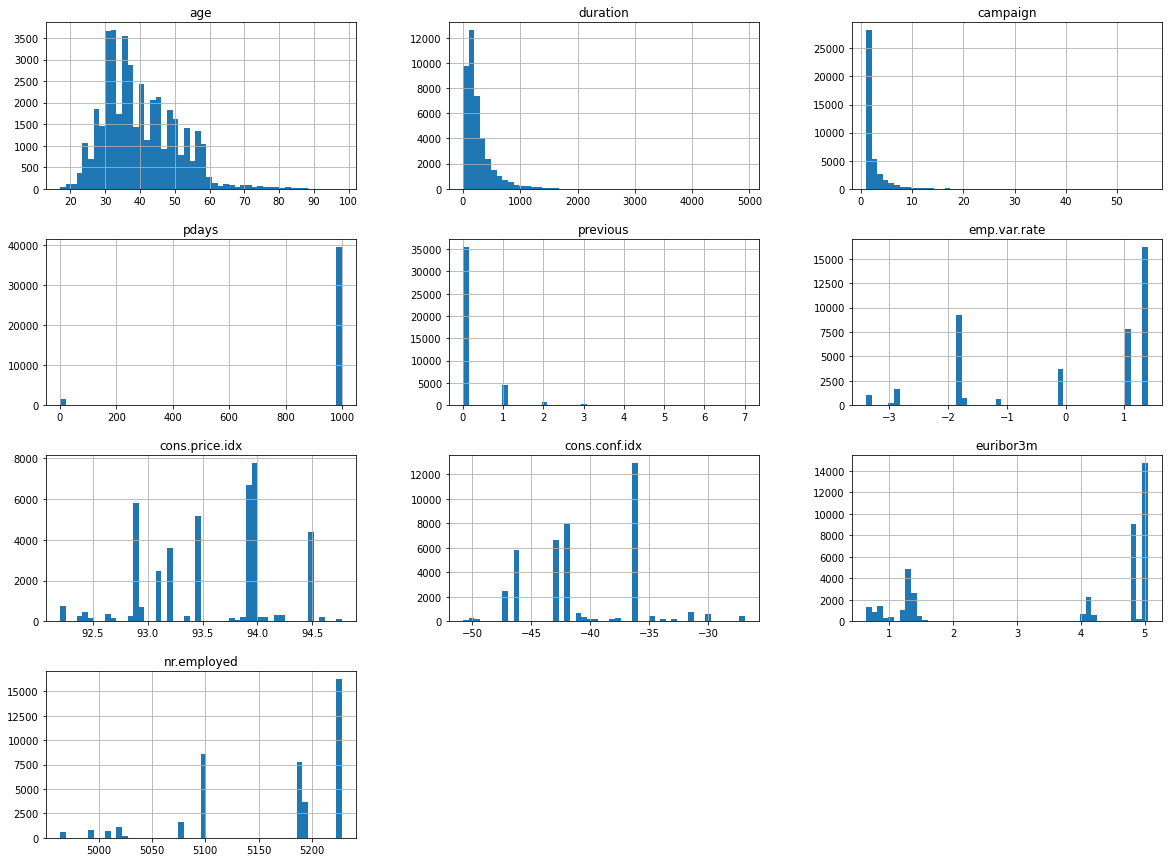

In [14]:
df[numerik].hist(bins=50, figsize=(20,15))
plt.show()

`terlihat bahwa semua data numerik memiliki distribusi skewness`

### Visualisai Data Kategorik

- membuat fungsi def agar memudahkan untuk memvisualisasikan data kategorik

In [15]:
def countplot(x):
    print(df[x].value_counts())
    plt.figure(figsize=(18,2))
    sns.countplot(x=x, data=df, palette='Set1').axes.set_title(i,fontsize=50)
    plt.show()

- proses visualisasi data kategorik

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


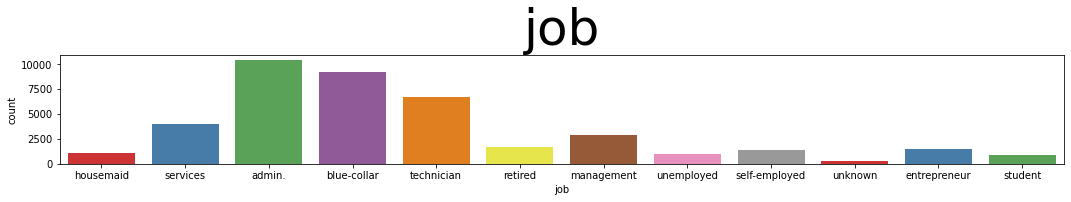

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


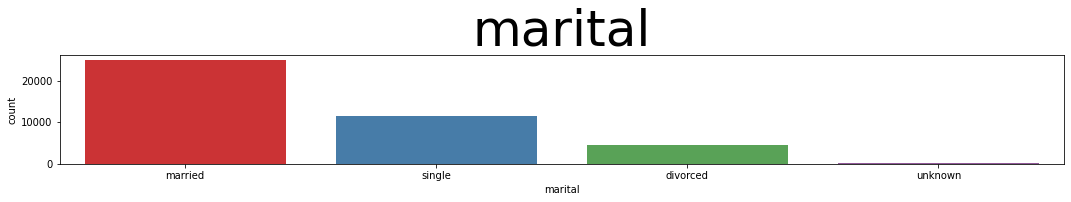

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


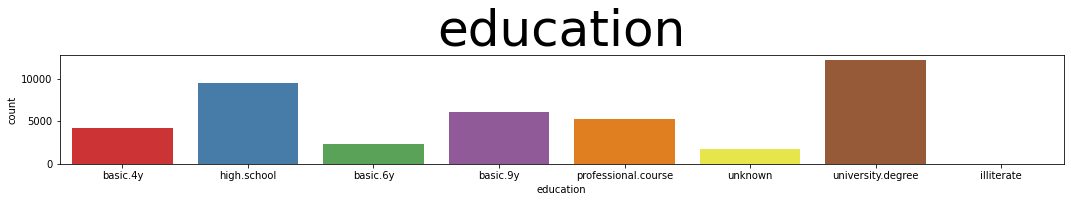

no         32588
unknown     8597
yes            3
Name: default, dtype: int64


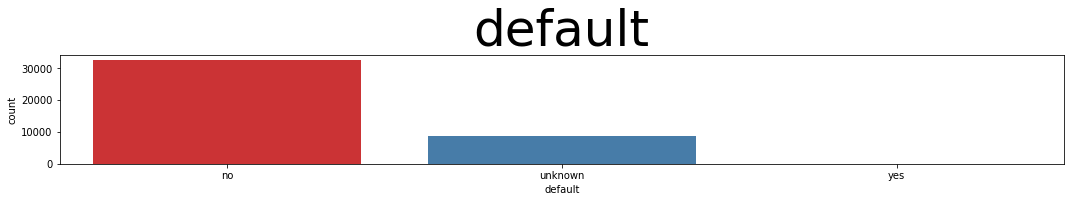

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


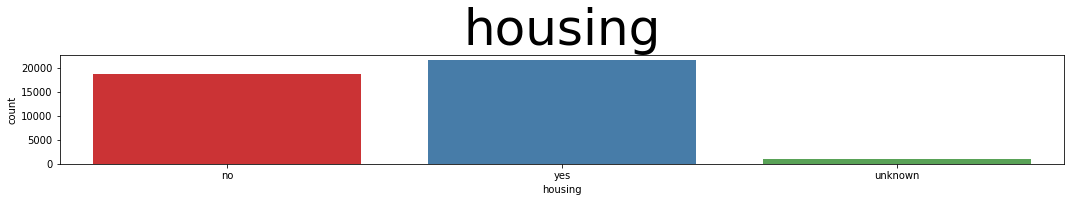

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


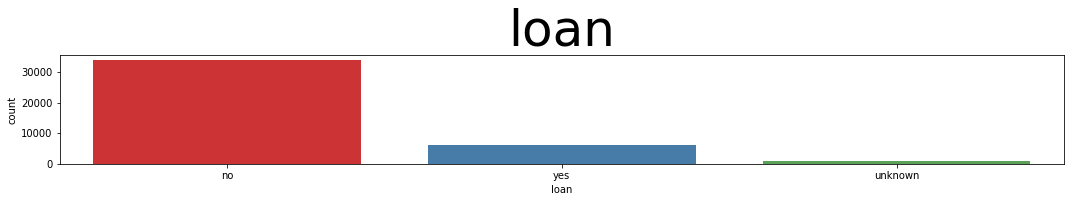

cellular     26144
telephone    15044
Name: contact, dtype: int64


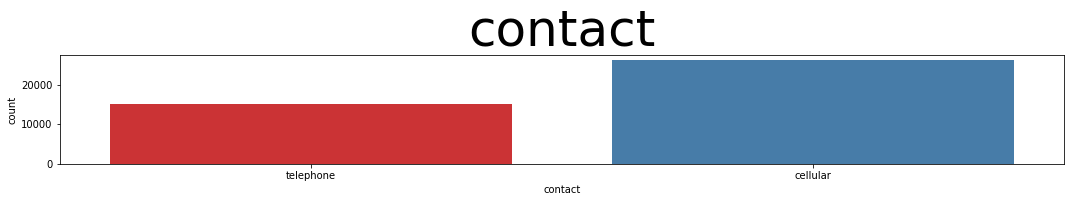

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


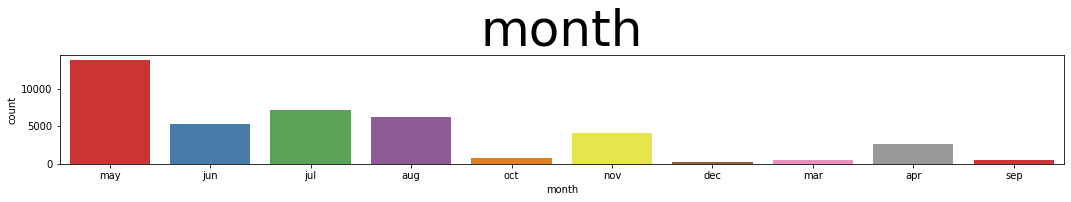

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


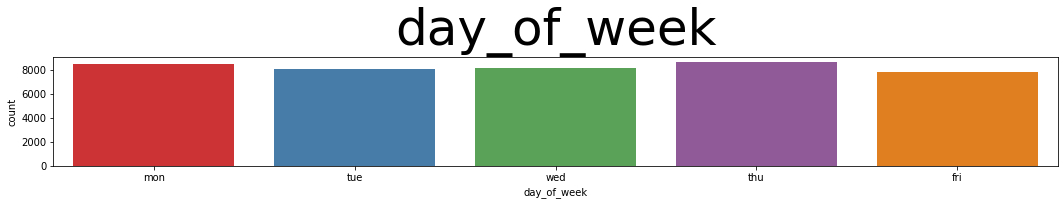

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


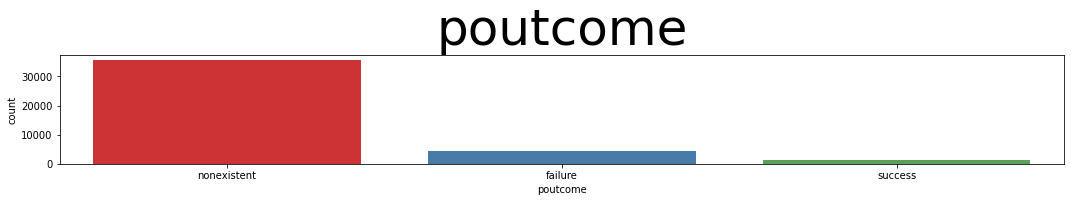

no     36548
yes     4640
Name: y, dtype: int64


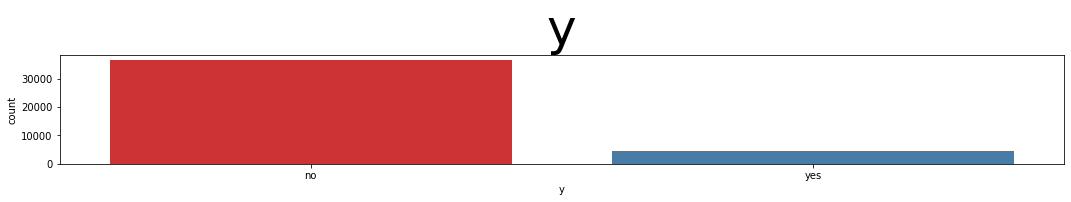

In [16]:
for i in df[kategorik]:
    countplot(i)

`- untuk kolom 'job' value admin. akan saya ubah menjadi admin, ini dilakukan untuk mempermudah pengerjaan kedepannya`

In [17]:
df.loc[df['job'] == 'admin.', 'job'] = 'admin'

### Cek Korelasi antar variabel (fitur dan target)

- membuat salinan data untuk proses pengecekan korelasi

In [18]:
df_test = df.copy()

- membuat fungsi untuk encoding data label / kolom y menggunakan label encoding

In [19]:
def label(col):
    label = preprocessing.LabelEncoder()
 
    df_test[col]  = label.fit_transform(df_test[col])

- menjalankan proses encoding label y

In [20]:
label('y')

- cek korelasi dataset

In [21]:
korelasi = df_test.corr()
korelasi

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


<AxesSubplot:>

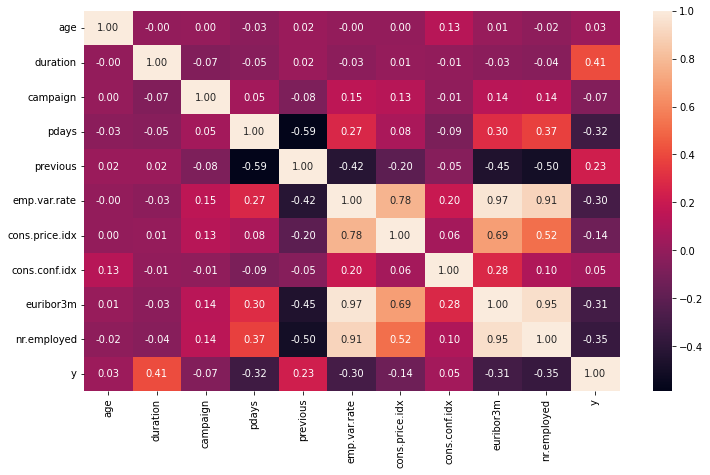

In [22]:
plt.figure(figsize=(12,7))

sns.heatmap(korelasi, annot=True, fmt='.2f')

`Untuk korelasi ini saya akan kelompokkan menjadi 3 kategori:`
1. `data dengan korelasi diatas 0.2, adalah jenis data yang memiliki korelasi berbanding lurus dengan label, yang artinya semakin naik nilai variabel maka nilai label juga akan naik.`
#
2. `data dengan korelasi diantara 0.2 sampai -0.2, adalah jenis data yang tidak terlalu berkorelasi dengan label yang artinya ada atau tidaknya data tersebut tidak akan mempengaruhi label secara significant.`
#
3. `data dengan korelasi dibawah -0.2, adalah jenis data yang memiliki korelasi berbanding terbalik dengan label, yang artinya semakin naik nilai label maka semakin turun nilai variabelnya.` 

`data yang akan diambil atau digunakan adalah kategori 1 dan 3, diantaranya ; duration, pdays, previous, emp.var.rate, euribor3m, nr.employed`

<hr>

## 4. Preprocessing

### Cek Missing Value

- sebelum data di split ada baiknya cek <i>` missing value  `</i> pada dataset

In [23]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

`tidak terdapat missing value`

### Membagi data menjadi label dan fitur

In [24]:
X = df.drop('y', axis=1)       # fitur
y = df['y']                    # label

### Cek keseimbangan jumlah data

In [25]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

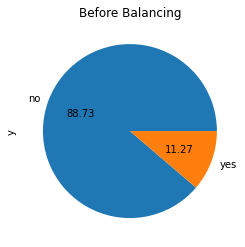

In [26]:
ax = y.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Before Balancing")

`berdasarkan data dari visualisasi, terdapat imbalance data pada label`
- `value yes (11.27 % dari total data atau sebanyak 4640)`
- `value no  (88.73 % dari total data atau sebanyak 36548)`

`oleh karena itu akan dilakukan proses `<i>balancing </i>` dengan metode `<i> Random Oversampling</i>

In [27]:
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_ros, y_ros = ros.fit_resample(X, y)

In [28]:
y_ros.value_counts()

no     36548
yes    36548
Name: y, dtype: int64

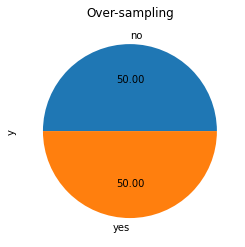

In [29]:
ax = y_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

`Setelah dilakukan balancing, jumlah proporsi data telah sama yaitu 50% dengan jumlah masing-masing 36548`

### Membagi data menjadi data train dan data test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=2)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (58476, 20) (58476,)
Test set: (14620, 20) (14620,)


### Cek Outliers

- cek statistik dasar pada dataset

In [31]:
tengah = [] #list kosong

# looping untuk mencetak median dari [numerik] dan dimasukkan ke list tengah
for i in X_train[numerik].columns:
    tengah.append(X_train[numerik][i].median())

# ubah list tengah menjadi dataframe lalu di transpose 
med = pd.DataFrame(tengah).transpose()

# mengubah nama kolom
med.rename(columns={0:'age', 1: 'duration', 2:'campaign',3: 'pdays',4: 'previous',5: 'emp.var.rate',
       6: 'cons.price.idx',7: 'cons.conf.idx',8: 'euribor3m',9: 'nr.employed' }, inplace=True)

#menggabungkan describe() dengan med
desk = X_train.describe()
desc = pd.concat([med, desk], axis=0).rename(index={0:'median'})
desc

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
median,38.000000,265.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
count,58476.000000,58476.000000,58476.000000,58476.000000,58476.000000,58476.000000,58476.000000,58476.000000,58476.000000,58476.000000
mean,40.389442,387.315548,2.337078,888.368442,0.309871,-0.487002,93.481417,-40.228106,2.969188,5135.714650
std,11.988483,357.588303,2.387107,312.440959,0.692266,1.719195,0.632215,5.335709,1.889668,87.056578
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,144.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,265.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,527.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4199.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- cek outliers melaluii visualisasi

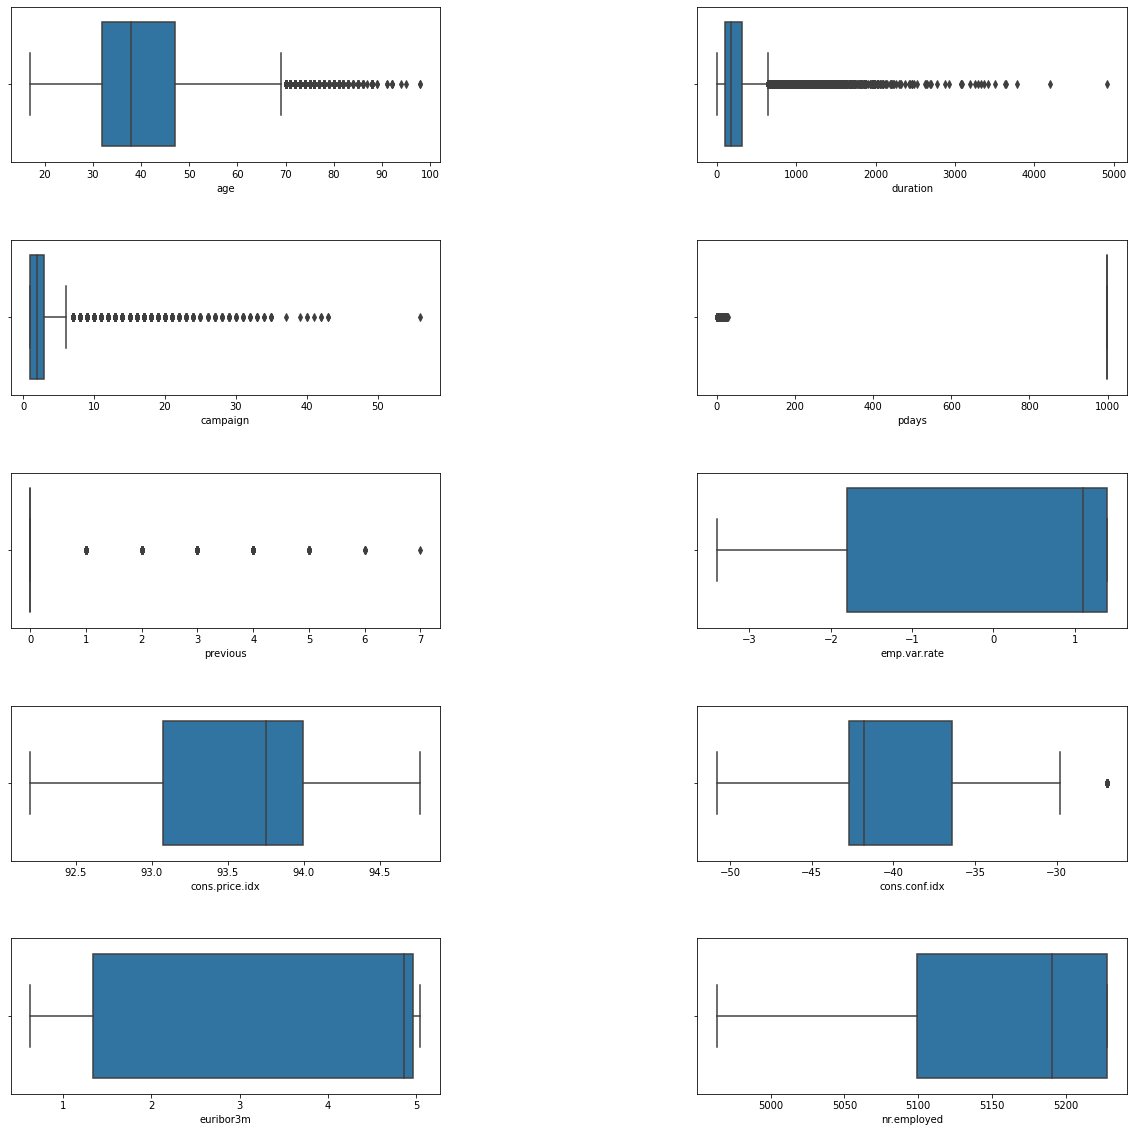

In [32]:
fig = plt.figure()
fig.set_size_inches(20, 20)
fig.subplots_adjust(hspace=0.5, wspace=0.6)

jum = 1
for i in range(len(X_train[numerik].columns)):
    ax = fig.add_subplot(5, 2, jum)
    sns.boxplot(x= X_train[numerik].columns[i], data=df)
    # plt.title(X_train[numerik].columns[i])
    jum+= 1

- cek data outlier

In [33]:
def cek_iqr(df, x):
    q1 = df[x].quantile(0.25) # 25% percentile
    q3 = df[x].quantile(0.75) # 75% percentile
    
    IQR = q3-q1
    bawah  = q1-1.5*IQR
    atas = q3+1.5*IQR
    
    return IQR, bawah, atas


# fungsi untuk mengecek data outlier

def cek_outlier(df, col):   
    iqr, bawah, atas = cek_iqr(df,col)
    return df[(df[col] < bawah) | (df[col] > atas)]

# fungsi untuk menghapus outlier

def hapus_outlier(df, col):
    iqr, bawah, atas = cek_iqr(df,col)
    df.drop(df[ (df[col] < bawah) | (df[col] > atas) ].index, inplace=True)
    
# fungsi untuk mengganti nilai outlier

def ganti_outlier_median(df, col):
    iqr, bawah, atas = cek_iqr(df,col)
    df[col] = np.where(df[col] > atas , df[col].median(), df[col])
    df[col] = np.where(df[col] < bawah, df[col].median(), df[col])  


`membuat fungsi untuk diaplikasikan di outliers, namun setiap fitur memiliki kondisi yang berbeda sehingga terkadang fungsi akan digunakan`

In [34]:
for i in X_train[numerik]:
    print('fitur',i,' : outlier', cek_outlier(X_train, i)[i].size)

fitur age  : outlier 1093
fitur duration  : outlier 2852
fitur campaign  : outlier 2549
fitur pdays  : outlier 6515
fitur previous  : outlier 12668
fitur emp.var.rate  : outlier 0
fitur cons.price.idx  : outlier 0
fitur cons.conf.idx  : outlier 1273
fitur euribor3m  : outlier 0
fitur nr.employed  : outlier 0


### <i>Handling outliers</i>

- fitur yang memiliki outlier ada 6 fitur, diantaranya age, duration, campaign, pdays, previous, dan cons.conf.idx
- namun, yang akan di modifikasi hanya 3 yaitu duration, pdays dan previous
- penanganan pada setiap fitur akan berbeda tergantung situasi dan kondisi fitur

- `fitur duration`

In [35]:
ganti_outlier_median(X_train, 'duration')

- `fitur previous`

In [36]:
ganti_outlier_median(X_train, 'previous')

- `fitur pdays`

In [37]:
ganti_outlier_median(X_train, 'pdays')

### <i>Feature selection</i>

- `Numerical feature selection`

<i>numerikan feature selection</i> di pilih berdasarkan korelasi yang ditunjukkan pada heatmap, dimana pada case ini yang dipilih adalah kategori 1 dan 3, sementara sisanya akan dihapus

In [38]:
X_train_sel = X_train.drop(['age', 'campaign', 'cons.price.idx', 'cons.conf.idx'], axis = 1)
X_test_sel = X_test.drop(['age', 'campaign', 'cons.price.idx', 'cons.conf.idx'], axis = 1)

- `Categorical feature selection`

sama seperti numerical, pada categorical feature selection juga akan dipilih berdasarkan korelasi antara label dan fitur, dimana pada kasus ini menggunakan chi square untuk mengetahui korelasi diantara label dan fitur.

In [39]:
kolom = df[kategorik].drop('y', axis=1).columns

In [40]:
# def cek_chi_square(col):
#     cek = pd.crosstab(df[kategorik][col],df[kategorik]['y'])
#     stat, p, dof, expected = stats.chi2_contingency(cek)
#     print('p = %.4f' % (p))
#     if p <= 0.05:
#         print('fitur',col,'kemungkinan dependen dengan label')
#         print('')
#     else:
#         print('fitur',col,'Probably independen dengan label')
#         print('')


def cek_chi2(col):
    cek = pd.crosstab(df[kategorik][col],df[kategorik]['y'])
    stat, p, dof, expected = stats.chi2_contingency(cek)
    
    return p

In [41]:
for i in kolom:
    if cek_chi2(i) > 0.05:
        print('fitur',i,'independen (',round(cek_chi2(i),4),')')

fitur housing independen ( 0.0583 )
fitur loan independen ( 0.5787 )


`berdasarkan hasil chi square, diketahui bahwa fitur housing dan fitur loan bersifat independen yang artinya kemungkinan tidak memiliki hubungan dengan label y`

### <i>Feature encoding</i>

- encoding fitur kategorik

In [42]:
def hot(col):
    hot = OneHotEncoder(sparse=False)
    
    train  =  hot.fit_transform(X_train[[col]])
    test   =  hot.fit_transform(X_test[[col]])
    
    train_df = pd.DataFrame(train)
    test_df = pd.DataFrame(test)
    
    header_train = X_train[col].sort_values().unique()
    header_test = X_test[col].sort_values().unique()
    
    train_df.columns = col+'_'+header_train
    test_df.columns  = col+'_'+header_test
    
    
    return train_df, test_df

In [43]:
train_job,          test_job         = hot('job')
train_marital,      test_marital     = hot('marital')
train_education,    test_education   = hot('education')
train_default,      test_default     = hot('default')
train_contact,      test_contact     = hot('contact')
train_month,        test_month       = hot('month')
train_day_of_week,  test_day_of_week = hot('day_of_week')
train_poutcome,     test_poutcome    = hot('poutcome')

`setelah di encoding, terdapat 1 fitur yang hasilya berbeda pada x_train dan y_train nya yaitu fitur default`

- cek ulang hasil encoing

In [44]:
cek_enc = {
    'job'           : [train_job.shape[1]         , test_job.shape[1]],
    'marital'       : [train_marital.shape[1]     , test_marital.shape[1]],
    'education'     : [train_education.shape[1]   , test_education.shape[1]],
    'default'       : [train_default.shape[1]     , test_default.shape[1]],
    'contact'       : [train_contact.shape[1]     , test_contact.shape[1]],
    'month'         : [train_month.shape[1]       , test_month.shape[1]],
    'day_of_week'   : [train_day_of_week.shape[1] , test_day_of_week.shape[1]],
    'poutcome'      : [train_poutcome.shape[1]    , test_poutcome.shape[1]]   
}

In [45]:
pd.DataFrame(cek_enc)

,job,marital,education,default,contact,month,day_of_week,poutcome
0,12,4,8,3,2,10,5,3
1,12,4,8,3,2,10,5,3


`terlihat bahwa hasil encoding tidak memiliki perbedaan kolom`

### Menggabungkan semua fitur

In [46]:
X_train_gab = pd.concat([X_train[numerik].reset_index(drop=True), train_job, train_marital, train_education, train_default, train_contact, train_month, train_day_of_week, train_poutcome], axis= 1)

X_test_gab = pd.concat([X_test[numerik].reset_index(drop=True), test_job, test_marital, test_education, test_default, test_contact, test_month, test_day_of_week, test_poutcome], axis= 1)

### Data Normalization

In [47]:
cols = X_train_gab.columns

In [48]:
scaler = MinMaxScaler()

In [49]:
X_train_new = scaler.fit_transform(X_train_gab)
X_test_new = scaler.transform(X_test_gab)

<hr>

## 5. Modelling

<i>`disclaimer`</i>

nilai yang keluar pada model bisa jadi berbeda dengan <i>text</i> atau keterangan, karena telah di<i>run</i> beberapa kali sebelum di push 

        Pada tahap ini akan dilakukan beberapa modeling, diantarnya:
                a. Logistic Regression
                b. Naive Bayes
                c. K-Nearest Neighbors
                d. Decision Tree
                e. Support Vector Machines
                f. Random Forest
                g. Perceptron

In [50]:
# fungsi untuk fitting model

def fitting(model):
    
    model.fit(X_train_new, y_train)
    score_test  = model.score(X_test_new,  y_test)
    score_train = model.score(X_train_new, y_train)
    return score_train, score_test

In [51]:
# fungsi untuk mencari best param

def best_param(model):
    model_ml = model()
    model_random = RandomizedSearchCV(estimator = model_ml, param_distributions = random_grid1, n_iter = 100, cv = 3, verbose=2, random_state=2, n_jobs = -1)
    model_random.fit(X_train_new, y_train) 
    best_param = model_random.best_params_
    
    return best_param

In [52]:
# def cek_over(batas, model):

#     values = [i for i in range(1, batas)]
#     for i in values:
#         model.fit(X_train_new, y_train)
        
#         y_pred = logreg.predict(X_train_new)
        
#         train_acc = accuracy_score(y_train, y_pred)
#         train_scores.append(train_acc)

#         y_pred = model.predict(X_test_new)
#         test_acc = accuracy_score(y_test, y_pred)
#         test_scores.append(test_acc)

#         xtrain.append(train_acc)
#         xtest.append(test_acc)
#         print('%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    
#     pyplot.plot(values, train_scores, '-o', label='Train')
#     pyplot.plot(values, test_scores, '-o', label='Test')
#     pyplot.legend()
#     pyplot.show()

### `a. logistic regression`

#### mencari best hyperparameter

In [53]:
# mendefinisikan parameter
solver  = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)] 

random_grid1 = {'solver': solver,
                'max_iter': max_iter}

In [54]:
best_param(LogisticRegression)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'solver': 'lbfgs', 'max_iter': 30}

#### Training model

In [55]:
logreg = LogisticRegression(solver='sag', max_iter= 10, random_state=2)
logreg.fit(X_train_new, y_train)

LogisticRegression(max_iter=10, random_state=2, solver='sag')

#### Tes model

In [56]:
y_pred = logreg.predict(X_test_new)

#### Evaluasi model

- cek overfitting

In [57]:
print('Train set Accuracy: %.4f' % accuracy_score(y_train, logreg.predict(X_train_new)))
print('Test set Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Train set Accuracy: 0.8469
Test set Accuracy: 0.8764


    berdasarkan dari score data train dan test, terlihat bahwa model tidak mengalami overfitting dimana hasil skor score Data Train (0.8469) < score Data Test (0.8764)

- Kita juga dapat menampilkan <i>classification_report<i>-nya.

In [58]:
# confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred)

# classification report
print('Classification report : ')
print(classification_report(y_test, y_pred, zero_division=1))

Classification report : 
              precision    recall  f1-score   support

          no       0.91      0.83      0.87      7326
         yes       0.85      0.92      0.88      7294

    accuracy                           0.88     14620
   macro avg       0.88      0.88      0.88     14620
weighted avg       0.88      0.88      0.88     14620



    berdasarkan classification report, dapat ditarik kesimpulan:

    - bahwa model memiliki accuracy 0.88
    - dari f1 score terlihat model cukup baik sehingga kemungkinan untuk prediksi akan akurat

### `b. Naive Bayes`

#### Training model

In [59]:
nbgas = GaussianNB()
nbgas.fit(X_train_new, y_train)

GaussianNB()

#### Tes model

In [60]:
y_pred_nbgas = nbgas.predict(X_test_new)

#### Evaluasi model

- cek overfitting

In [61]:
print('Train set Accuracy: %.4f' % accuracy_score(y_train, nbgas.predict(X_train_new)))
print('Test set Accuracy: %.4f' % accuracy_score(y_test, y_pred_nbgas))

Train set Accuracy: 0.7604
Test set Accuracy: 0.7818


    berdasarkan dari score data train dan test, terlihat bahwa model tidak mengalami overfitting dimana hasil skor score Data Train (0.7604) < score Data Test (0.7818)

- Kita juga dapat menampilkan <i>classification_report<i>-nya.

In [62]:
# confusion matrix
cm_nbgas = confusion_matrix(y_test, y_pred_nbgas)

#classification report
print('Classification report : ')
print(classification_report(y_test, y_pred_nbgas, zero_division=1))

Classification report : 
              precision    recall  f1-score   support

          no       0.82      0.73      0.77      7326
         yes       0.75      0.84      0.79      7294

    accuracy                           0.78     14620
   macro avg       0.79      0.78      0.78     14620
weighted avg       0.79      0.78      0.78     14620



    berdasarkan classification report, dapat ditarik kesimpulan:

    - bahwa model memiliki accuracy 0.78
    - dari f1 score terlihat bahwa model cukup baik namun lebih baik ditingkatkan lagi untuk lebih akurat pada saat memprediksi

### `c. K-Nearest Neighbor`

#### mencari best hyperparameter

`tidak dilakukan grid search karena sumber daya (laptop) tidak sanggup memproses lebih lanjut`

In [63]:
# # mendefinisikan parameter
# weights = ['uniform', 'distance']
# n_neighbors = [int(x) for x in np.linspace(3, 10, num = 8)]
# leaf_size = [int(x) for x in np.linspace(10, 50, num = 5)]

# random_grid1 = {'n_neighbors': n_neighbors,
#                 'weights': weights,
#                 'leaf_size': leaf_size}

In [64]:
# best_param(DecisionTreeClassifier)

#### Training model

In [65]:
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(X_train_new, y_train)

KNeighborsClassifier()

#### Tes model

In [66]:
y_pred_knn = model_knn.predict(X_test_new)

#### Evaluasi model

- cek overfitting

In [67]:
print('Train set Accuracy: %.4f' % accuracy_score(y_train, model_knn.predict(X_train_new)))
print('Test set Accuracy: %.4f' % accuracy_score(y_test, y_pred_knn))

Train set Accuracy: 0.9352
Test set Accuracy: 0.9016


    berdasarkan dari score data train dan test, terlihat bahwa model mengalami overfitting dimana hasil skor score Data Train (0.9352) > score Data Test (0.9016)

- Kita juga dapat menampilkan <i>classification_report<i>-nya.

In [68]:
# confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

#classification report
print('Classification report : ')
print(classification_report(y_test, y_pred_knn, zero_division=1))

Classification report : 
              precision    recall  f1-score   support

          no       0.97      0.83      0.89      7326
         yes       0.85      0.98      0.91      7294

    accuracy                           0.90     14620
   macro avg       0.91      0.90      0.90     14620
weighted avg       0.91      0.90      0.90     14620



    berdasarkan classification report, dapat ditarik kesimpulan:

    - bahwa model memiliki accuracy 0.90
    - dari f1 score terlihat model sangat baik sehingga kemungkinan untuk prediksi akan sangat akurat

### `d. Decision Tree`

#### mencari best hyperparameter

In [69]:
# mendefinisikan parameter
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [0, 2, 4]

random_grid1 = {'criterion': criterion,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split}

In [70]:
best_param(DecisionTreeClassifier)

Fitting 3 folds for each of 66 candidates, totalling 198 fits


{'min_samples_split': 2, 'max_depth': 80, 'criterion': 'entropy'}

#### Training model

In [71]:
model_dtree = DecisionTreeClassifier(min_samples_split = 2, max_depth = 60, criterion='gini')
model_dtree.fit(X_train_new, y_train)

DecisionTreeClassifier(max_depth=60)

#### Tes model

In [72]:
y_pred_dtree = model_dtree.predict(X_test_new)

#### Evaluasi model

- cek overfitting

In [73]:
print('Train set Accuracy: %.4f' % accuracy_score(y_train, model_dtree.predict(X_train_new)))
print('Test set Accuracy: %.4f' % accuracy_score(y_test, y_pred_dtree))

Train set Accuracy: 0.9999
Test set Accuracy: 0.9394


    berdasarkan dari score data train dan test, terlihat bahwa model mengalami overfitting dimana hasil skor score Data Train (0.9999) > score Data Test (0.9394)

- Kita juga dapat menampilkan <i>classification_report<i>-nya.

In [74]:
# confusion matrix
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

#classification report
print('Classification report : ')
print(classification_report(y_test, y_pred_dtree, zero_division=1))

Classification report : 
              precision    recall  f1-score   support

          no       0.95      0.93      0.94      7326
         yes       0.93      0.95      0.94      7294

    accuracy                           0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94      0.94      0.94     14620



    berdasarkan classification report, dapat ditarik kesimpulan:

    - bahwa model memiliki accuracy 0.94
    - f1 score sangat baik dan kemungkinan model untuk memprediksi akan sangat akurat

### `e. Random Forest`

#### mencari best hyperparameter

`tidak dilakukan grid search karena sumber daya (laptop) tidak sanggup memproses lebih lanjut`

In [75]:
# # mendefinisikan parameter
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]

# random_grid1 = {'n_estimators': n_estimators,
#                 'min_samples_split': min_samples_split,
#                 'min_samples_leaf': min_samples_leaf}

In [76]:
# best_param(RandomForestClassifier)

#### Training model

In [77]:
model_rf = RandomForestClassifier(n_estimators=100, min_samples_split= 2, min_samples_leaf= 4, bootstrap= True)
model_rf.fit(X_train_new, y_train)

RandomForestClassifier(min_samples_leaf=4)

#### Tes model

In [78]:
y_pred_rf = model_rf.predict(X_test_new)

#### Evaluasi model

- cek overfitting

In [79]:
print('Train set Accuracy: %.4f' % accuracy_score(y_train, model_rf.predict(X_train_new)))
print('Test set Accuracy: %.4f' % accuracy_score(y_test, y_pred_rf))

Train set Accuracy: 0.9608
Test set Accuracy: 0.9397


    berdasarkan dari score data train dan test, terlihat bahwa model mengalami overfitting dimana hasil skor score Data Train (0.9608) > score Data Test (0.9397)

- Kita juga dapat menampilkan <i>classification_report<i>-nya.

In [80]:
# confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

#classification report
print('Classification report : ')
print(classification_report(y_test, y_pred_rf, zero_division=1))

Classification report : 
              precision    recall  f1-score   support

          no       0.99      0.89      0.94      7326
         yes       0.90      0.99      0.94      7294

    accuracy                           0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94      0.94      0.94     14620



    berdasarkan classification report, dapat ditarik kesimpulan:

    - bahwa model memiliki accuracy 0.94
    - f1 score terlihat mempunyai skor yang tinggi dan cukup seimbang sehingga kemungkinan besar model dapat memprediksi dengan tepat

### `f. Support Vector Machine`

#### mencari best hyperparameter

`tidak dilakukan grid search karena sumber daya (laptop) tidak sanggup memproses lebih lanjut`

In [81]:
# # mendefinisikan parameter
# kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
# C = [1, 2, 3]

# random_grid1 = {'kernel': kernel,
#                 'C': C}

In [82]:
# best_param(SVC)

#### Training model

In [83]:
model_svc = SVC(kernel='poly', C= 1)
model_svc.fit(X_train_new, y_train)

SVC(C=1, kernel='poly')

#### Tes model

In [84]:
y_pred_svc = model_svc.predict(X_test_new)

#### Evaluasi model

- cek overfitting

In [85]:
print('Train set Accuracy: %.4f' % accuracy_score(y_train, model_svc.predict(X_train_new)))
print('Test set Accuracy: %.4f' % accuracy_score(y_test, y_pred_svc))

Train set Accuracy: 0.8784
Test set Accuracy: 0.8967


    berdasarkan dari score data train dan test, terlihat bahwa model mengalami overfitting dimana hasil skor score Data Train (0.8784) < score Data Test (0.8967)

- Kita juga dapat menampilkan <i>classification_report<i>-nya.

In [86]:
# confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

#classification report
print('Classification report : ')
print(classification_report(y_test, y_pred_svc, zero_division=1))

Classification report : 
              precision    recall  f1-score   support

          no       0.95      0.83      0.89      7326
         yes       0.85      0.96      0.90      7294

    accuracy                           0.90     14620
   macro avg       0.90      0.90      0.90     14620
weighted avg       0.90      0.90      0.90     14620



    berdasarkan classification report, dapat ditarik kesimpulan:

    - bahwa model memiliki accuracy 0.90
    - f1 score terlihat sangat baik dan jika model digunakan, akan menghasilkan prediksi yang akurat

### `g. Perceptron`

#### Training model

In [87]:
model_percpt = Perceptron()
model_percpt.fit(X_train_new, y_train)

Perceptron()

#### Tes model

In [88]:
y_pred_per = model_percpt.predict(X_test_new)

#### Evaluasi model

- cek overfitting

In [89]:
print('Train set Accuracy: %.4f' % accuracy_score(y_train, model_percpt.predict(X_train_new)))
print('Test set Accuracy: %.4f' % accuracy_score(y_test, y_pred_per))

Train set Accuracy: 0.6754
Test set Accuracy: 0.6813


    berdasarkan dari score data train dan test, terlihat bahwa model mengalami overfitting dimana hasil skor score Data Train (0.6754) < score Data Test (0.6813)

- Kita juga dapat menampilkan <i>classification_report<i>-nya.

In [90]:
# confusion matrix
cm_per = confusion_matrix(y_test, y_pred_per)

#classification report
print('Classification report : ')
print(classification_report(y_test, y_pred_per, zero_division=1))

Classification report : 
              precision    recall  f1-score   support

          no       0.95      0.38      0.55      7326
         yes       0.61      0.98      0.75      7294

    accuracy                           0.68     14620
   macro avg       0.78      0.68      0.65     14620
weighted avg       0.78      0.68      0.65     14620



    berdasarkan classification report, dapat ditarik kesimpulan:

    - bahwa model memiliki accuracy 0.85
    - berdasarkan f1 score, tampaknya hasil prediksi akan akurat apalagi didukung dengan seimbangnya nilai f1 score

<hr>

## 6. Model Inference

    Pada tahap ini akan dilakukan uji coba pada beberapa model (model inference) dengan 10 random data dari gabungan X_train dan X_test, diantarnya:
        a. Logistic Regression
        b. Naive Bayes
        c. K-Nearest Neighbors
        d. Decision Tree
        e. Support Vector Machines
        f. Random Forest

- Menguji model dengan membuat 10 random data secara acak dari gabungan X_train dan X_test

In [91]:
trainx = pd.DataFrame(X_train_new)
testx = pd.DataFrame(X_test_new)

In [92]:
testing = pd.concat([trainx.sample(10000), testx.sample(10000)], ignore_index = True)

In [93]:
dummy = testing.sample(10)

### `a. Logistic Regression`

In [94]:
dummy_loreg = logreg.predict(dummy)

### `b. Naive Bayes`

In [95]:
dummy_nbgas = nbgas.predict(dummy)

### `c. K-Nearest Neighbors`

In [96]:
dummy_knn = model_knn.predict(dummy)

### `d. Decision Tree`

In [97]:
dummy_dtree = model_dtree.predict(dummy)

### `e. Random Forest`

In [98]:
dummy_rf = model_rf.predict(dummy)

### `f. Support Vector Machines`

In [99]:
dummy_svc = model_svc.predict(dummy)

### `g. Perceptron`

In [100]:
dummy_per = model_percpt.predict(dummy)

- hasil prediksi

In [101]:
hasilpred = {
    'logistic regression' : dummy_loreg,
    'naive Bayes' : dummy_nbgas,
    'k nearest neighbor ' : dummy_knn,
    'decision tree' : dummy_dtree,
    'random forest' : dummy_rf,
    'support vector machine' : dummy_svc,
    'perceptron' : dummy_per
}

hasil_pred = pd.DataFrame(hasilpred)
hasil_pred

,logistic regression,naive Bayes,k nearest neighbor,decision tree,random forest,support vector machine,perceptron
0,no,no,no,no,no,no,yes
1,no,no,no,no,no,no,no
2,no,no,no,no,no,no,yes
3,yes,yes,yes,yes,yes,yes,yes
4,no,no,no,no,no,no,no
5,no,no,no,no,no,yes,yes
6,yes,yes,yes,yes,yes,yes,yes
7,yes,yes,yes,yes,yes,yes,yes
8,no,no,yes,yes,yes,yes,yes
9,yes,yes,yes,yes,yes,yes,yes


<hr>

## 7. Keimpulan

In [102]:
# fungsi untuk mengecek confussion matrix

def CM(CM, con1, con2):
    rec_no   = round(CM[0][0]/(CM[0][0]+CM[0][1]),2)
    rec_yes  = round(CM[1][1]/(CM[1][1]+CM[1][0]),2)
    prec_no  = round(CM[0][0]/(CM[0][0]+CM[1][0]),2)
    prec_yes = round(CM[1][1]/(CM[1][1]+CM[0][1]),2)
    
    if con1 == 'recall':
        if con2 == 'no':
            return rec_no
        
        if con2 == 'yes':
            return rec_yes
            
    if con1 == 'precision':
        if con2 == 'no':
            return prec_no
        
        if con2 == 'yes':
            return prec_yes
        
    if con1 == 'f1':
        if con2 == 'no':
            return round(2*(rec_no*prec_no)/(rec_no+prec_no),2)
        
        if con2 == 'yes':
            return round(2*(rec_yes*prec_yes)/(rec_yes+prec_yes),2)
        
    if con1 == 'accuracy':
        return round((CM[0][0]+CM[1][1])/(CM[0][0]+CM[0][1]+CM[1][0]+CM[1][1]),2)

### EDA Analysis

berdasarkan EDA, data numerik kebanyakan tidak berdistribusi normal karena data tidak merata dan lebih banyak pada satu value, begitu pula dengan data kategorik dimana data tidak balance dan kebanyakan data lebih banyak pada satu value.

### Mode Analysis

Dari beberapa model yang telah dibuat, berikut adalah rangkuman dari nilai f1-score dan accuracy-nya:

In [103]:
data_class= {'logistric regression' : [CM(cm_logreg, 'precision','no'), CM(cm_logreg, 'precision','yes'), CM(cm_logreg, 'recall','no'), CM(cm_logreg, 'recall','yes'), CM(cm_logreg, 'f1','no'), CM(cm_logreg, 'f1','yes'), CM(cm_logreg, 'accuracy',_)],
             'naive bayes' : [CM(cm_nbgas, 'precision','no'), CM(cm_nbgas, 'precision','yes'), CM(cm_nbgas, 'recall','no'), CM(cm_nbgas, 'recall','yes'), CM(cm_nbgas, 'f1','no'), CM(cm_nbgas, 'f1','yes'), CM(cm_nbgas, 'accuracy',_)],
             'knn' : [CM(cm_knn, 'precision','no'), CM(cm_knn, 'precision','yes'), CM(cm_knn, 'recall','no'), CM(cm_knn, 'recall','yes'), CM(cm_knn, 'f1','no'), CM(cm_knn, 'f1','yes'), CM(cm_knn, 'accuracy',_)],
             'decision tree' : [CM(cm_dtree, 'precision','no'), CM(cm_dtree, 'precision','yes'), CM(cm_dtree, 'recall','no'), CM(cm_dtree, 'recall','yes'), CM(cm_dtree, 'f1','no'), CM(cm_dtree, 'f1','yes'), CM(cm_dtree, 'accuracy',_)],
             'random forest' : [CM(cm_rf, 'precision','no'), CM(cm_rf, 'precision','yes'), CM(cm_rf, 'recall','no'), CM(cm_rf, 'recall','yes'), CM(cm_rf, 'f1','no'), CM(cm_rf, 'f1','yes'), CM(cm_rf, 'accuracy',_)],
             'svr' : [CM(cm_svc, 'precision','no'), CM(cm_svc, 'precision','yes'), CM(cm_svc, 'recall','no'), CM(cm_svc, 'recall','yes'), CM(cm_svc, 'f1','no'), CM(cm_svc, 'f1','yes'), CM(cm_svc, 'accuracy',_)],
             'perceptron' : [CM(cm_per, 'precision','no'), CM(cm_per, 'precision','yes'), CM(cm_per, 'recall','no'), CM(cm_per, 'recall','yes'), CM(cm_per, 'f1','no'), CM(cm_per, 'f1','yes'), CM(cm_per, 'accuracy',_)]
    }

data_model = pd.DataFrame(data_class).transpose()
data_model.rename(columns={0: 'precision no', 1: 'precision yes', 2: 'recall no', 3: 'recall yes', 4: 'f1 score no', 5: 'f1 score no', 6:'accuracy'}, inplace=True)

In [104]:
data_model

,precision no,precision yes,recall no,recall yes,f1 score no,f1 score no,accuracy
logistric regression,0.91,0.85,0.83,0.92,0.87,0.88,0.88
naive bayes,0.82,0.75,0.73,0.84,0.77,0.79,0.78
knn,0.97,0.85,0.83,0.98,0.89,0.91,0.90
decision tree,0.95,0.93,0.93,0.95,0.94,0.94,0.94
random forest,0.99,0.90,0.89,0.99,0.94,0.94,0.94
svr,0.95,0.85,0.83,0.96,0.89,0.90,0.90
perceptron,0.95,0.61,0.38,0.98,0.54,0.75,0.68


terlihat bahwa model yang memiliki nilai tertinggi adalah `random forest` dan `decision tree`, sehingga kurang lebih model terbaik yang dapat digunakan untuk memprediksi customer apakah akan melakukan deposito berjangka atau tidak adalah dengan menggunakan `random forest` atau `decision tree`